In [111]:
#Load libraries
library(tidyverse)
install.packages("quantmod")
install.packages("kableExtra")
library(quantmod)
library(lubridate)
library(scales)
library(kableExtra)
library(dplyr)

In [40]:
# Load data using the QuantMod package to retrive historical data
# The stock indexes are best loaded from yahoo finance

getSymbols(c("^GSPC"), src='yahoo', from = '1900-01-01', 
            to = Sys.Date(), warnings = TRUE)


[1] "^GSPC"

In [117]:
#Convert Quantmod returns to dataframes w/ prices and aggregated yearly returns

#S&p500 historical data
SP500YearReturns <- data.frame(GSPC) %>%
  #Convert row to dates
  mutate(QuoteDate = as.Date(row.names("GSPC.Close"), "%Y-%m-%d"),
  #only want daily Close Value
  CloseValue = GSPC.Close,
  #Use lag funct to compare each day to last
  mutate(Return = CloseValue / lag(CloseValue, n=1, order_by = QuoteDate) - 1) %>%
  dplyr::select(QuoteDate, Return) %>%
  filter(!is.na(Return))



ERROR: ignored

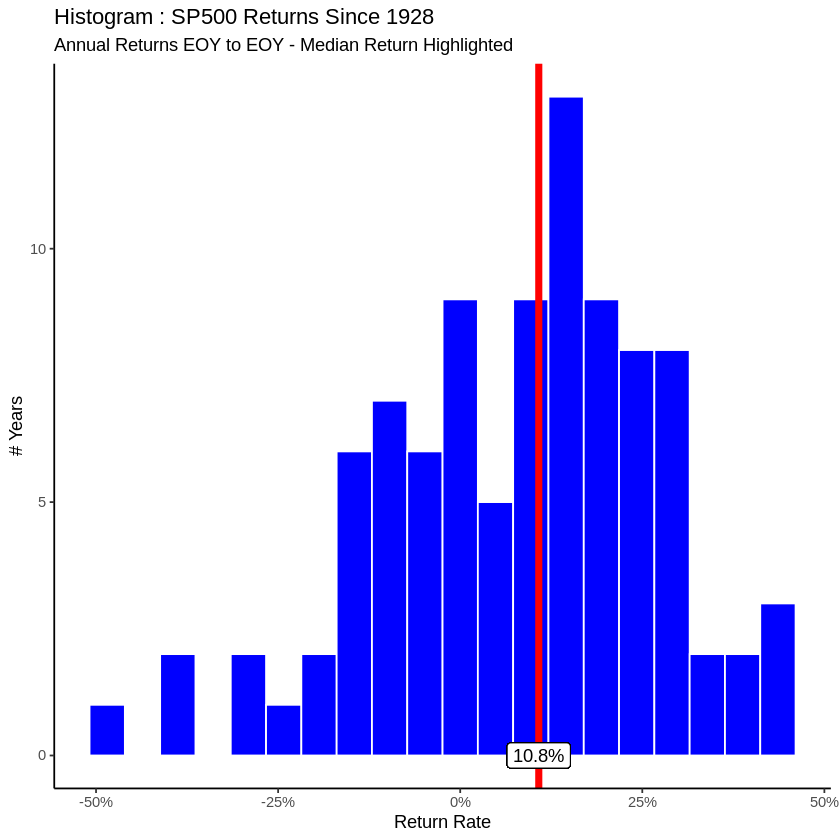

In [19]:
SP500YearReturns %>%
  ggplot() +
  geom_histogram(aes(Return), stat = "bin", bins = 20, 
                 fill = "blue", color = "white") +
  geom_vline(aes(xintercept = median(Return)), colour="red", linewidth = 2) +
  scale_x_continuous(labels = percent_format()) +
  theme_classic() +
  geom_label(aes(median(Return), 0, label = percent(median(Return),
                                                    accuracy = .1) )) +
  labs(
    title = paste0("Histogram : SP500 Returns Since ", year(min(SP500YearReturns$Year))), 
    subtitle = "Annual Returns EOY to EOY - Median Return Highlighted",
    x = "Return Rate", 
    y = "# Years")

In [8]:
#import data from 
# https://www.nasdaq.com/market-activity/index/spx/historical
#Data ranges from 11/25/2022 - 11-25/2021

RawData = read.csv("/content/HistoricalData.csv")
head(RawData)

df = 

,Date,Close.Last,Volume,Open,High,Low
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,11/25/2022,4026.12,--,4023.34,4034.02,4020.76
2,11/23/2022,4027.26,--,4000.30,4033.78,3998.66
3,11/22/2022,4003.58,--,3965.51,4005.88,3956.88
4,11/21/2022,3949.94,--,3956.23,3962.00,3933.34
5,11/18/2022,3965.34,--,3966.39,3979.89,3935.98
6,11/17/2022,3946.56,--,3919.26,3954.33,3906.54


In [1]:

#Risk-Free Interest Rate
#Might Change
#52-Week T-Bill Rates https://ycharts.com/indicators/1_year_treasury_rate
#Long-Term Average
r=.02856

#Dividend Yield
#Might Change to Mutual Fund Rates or something else
div=.0185

#Volatility
#If able find time frame and get calculations based on different Ts
#https://www.barchart.com/stocks/quotes/$SPX/options?expiration=2022-11-18-w&view=stacked&moneyness=10
vol=.2666

#SPX Last 10 Years Low --> High
#https://www.barchart.com/stocks/quotes/$SPX/interactive-chart
#S0<- 1398:4818
#S0 = c(1500,2000,2500,3000,3500,4000,4500,5000,5500
S0=3500
n1 = length(S0)
  
#Maturity Times Vector
#t= c(1/12,2/12,3/12,4/12,5/12,6/12,7/12,8/12,9/12,10/12,11,12,1,2,3,4,5,6,7,8,9,10)
t=.5
n2 = length(t)

#Strike Prices
#Should the Strike Price Range Be Changed
#K = 2000:7000
#K = c(2000,3000,4000,5000,6000,7000)
K=2000
n3 = length(K)

#D1Values = NULL
#D Values
#for (i in 1:n1)
#{
 # for (j in 1:n2)
 # {
   # for(w in 1:n3)
     # d1 = ((log(S0[i]/K[w]) + (r-div+(vol^2/2))*t[j])/(vol * sqrt(t[j])))
  
   # D1values = c(d1)
#  }
#}
#D1Values[1:10]
d1= ((log(S0/K)+ (r-div+(vol^2/2))*t)/(vol * sqrt(t)))
d2= (d1 - vol*sqrt(t))

#Theoretical Delta "Derivative of BScall in terms of S"
delta=(exp(-div*t)*pnorm(d1))
#Theoretical Call 
BScall= (S0*exp(-div*t)*pnorm(d1))-(K*exp(-r*t)*pnorm(d2))


#------------------------------------------------------------------
#Monte-Carlo Estimation

#Algorithm 1
#Generate a vector of 5000 normally distributed random numbers
Zi=rnorm(5000)
#5.1.16 5-14
#Check if I am implementing the Z tilde right
for(i in 1:5000)
{
  St = (S0 * (exp((r-div-((vol^2)/2))*t) + (vol * sqrt(t) *Zi)))
}
#St = (S0 * (exp((r-div-((vol^2)/2))*t) + (vol * sqrt(t) *Zi)))
#Eat something and fix this loop
#-----------------------------------------------------------
for (i in 1:5000)
{
  calltermnialpayoff = max((St[i]-K),0)
}
#calltermnialpayoff = max((St-K),0)
callpayoff = exp(-r*t) * calltermnialpayoff
calltermnialpayoff
#---------------------------------------------------------------------

#Do T-t
Nd1prime = exp(-d1^2/2)*(1/sqrt(2*pi))
Nd2prime = exp(-d2^2/2)*(1/sqrt(2*pi))

Gamma = exp(-div)














#READ THIS
#OK so I am interpreting things in two ways and there should only be one and both might be wrong but 
#Component 2 in the slides is "Specify how you use the emperical expectations to find the price and delta.
#"Hint what is E*[S(T)I(S(T)>K)] and what is its relationship with Delta
#This looks to be a partial expectation for price of a regular call  but this is also similar to the Asset or Nothing Call payoof and then price I might be fixating so if someone can explain away my confusion
#I am going to code out as if it isnt the Asset or nothing Call using content from 5.1 M5-17




#-------------------------------------------------------------
#payoff=NULL
#for(i in 1: 5000)
#{
#  payoff=c(payoff, ifelse(St[i]>k,St[i]-K,0))
#  }
#clapply

#price=mean(payoff)
#-------------------------------------------------------------










[1] 1333.417